[7, 18, 19, 1, 4, 8, 11, 24, 26]


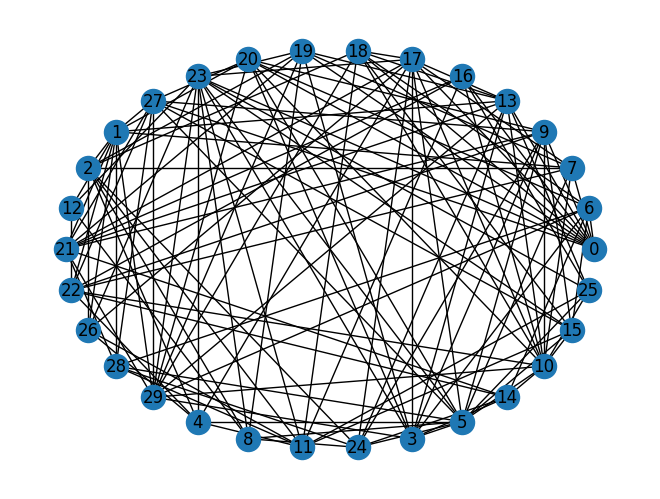

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import algorithmx
import pandas as pd
import baseGrafo
import random
import math



G = nx.read_edgelist("grafoBase2.csv", delimiter=",")
G = nx.relabel_nodes(G, lambda x: int(x))
print(list(G.neighbors(2)))

nx.draw_circular(G, with_labels=True)

In [ ]:
lista_vizinhos = {n: {viz: -1 for viz in G.neighbors(n)} for n in G.nodes()}
print(lista_vizinhos)
print(list(G.neighbors(0)))
print(lista_vizinhos[6])

In [ ]:
colores, coresN = baseGrafo.heuristicaGulosa(G)


In [ ]:

def custos(coloring):
        # Conta o número de conflitos (nós adjacentes com mesma cor)
        conflitos = sum(1 for u, v in G.edges() if coloring[u] == coloring[v])
        return conflitos

def simulated_annealing_coloringe(G, max_iter=50000, i_temp=1000, cooling_rate=0.995):
   # Inicializa coloração aleatória
    coloring, n_colors = baseGrafo.heuristicaGulosa(G)
    
    current_custo = custos(coloring)
    best_coloring = coloring.copy()
    best_custo_i = current_custo # Pego dados da solução inicial feita pela heuristica

    for node in coloring:
        if coloring[node] >= n_colors:
            coloring[node] = random.randint(0, n_colors - 1)
    
    current_custo = custos(coloring) 
    best_custo = current_custo
    print("solução inicial tem", n_colors+1, "cores")

    temp = i_temp
    f_colors = n_colors
    flag = False
    
    while(temp > 100):
            for i in range(max_iter):
                node = random.choice(list(G.nodes()))
                old_color = coloring[node]
                nova_cor = random.randint(0, n_colors-1)
                coloring[node] = nova_cor
                
                new_custo = custos(coloring)

                dif = new_custo - current_custo
                
                if dif < 0 or random.random() < math.exp(-dif / temp):
                    # Aceita nova solução
                    current_custo = new_custo
                    if new_custo < best_custo:
                        best_coloring = coloring.copy()
                        best_custo = new_custo
                else:
                    # Reverte mudança
                    coloring[node] = old_color

                # Opcional: parar se custo for 0 e tentar com menos cores(sem conflitos)
                if best_custo == 0 and i > 1500:
                    best_coloring_i = coloring.copy()
                    print("convergiu em 0, com", n_colors,"cores", "na iteracao", i)
                    f_colors =  n_colors # qtd de cores de quando houve o encontro da resposta viavel
                    n_colors -= 1
                    best_custo_i = best_custo # numero de convergencia
                    for node in coloring:
                        if coloring[node] >= n_colors:
                            coloring[node] = random.randint(0, n_colors - 1)
                    
                    best_custo = custos(coloring)
                    temp = i_temp
                    current_custo = best_custo
                    print("temperatura:", temp)
                    flag = True

                elif best_custo == 0:
                    best_custo_i = best_custo
                    best_coloring_i = best_coloring
                    f_colors = n_colors
                    print(n_colors, i)
                    break

                if i == max_iter-1 and flag == False:
                    best_coloring_i = best_coloring
                    best_custo_i = best_custo
                    print("bateu o ponto")
                    print("temperatura:", temp)

        # Atualiza temperatura
            temp *= cooling_rate

    return best_coloring_i, best_custo_i, f_colors

# Exemplo de uso
coloring, custo_final, cores= simulated_annealing_coloringe(G)

print('Coloração final:', coloring)
print(cores, 'cores')
print('Conflitos restantes:', custo_final)

In [19]:

def custo(coloring):
        # Conta o número de conflitos (nós adjacentes com mesma cor)
        conflitos = sum(1 for u, v in G.edges() if coloring[u] == coloring[v])
        return conflitos

def simulated_annealing_coloring(G, max_iter=500000, i_temp=1000, cooling_rate=0.995):
   # Inicializa coloração aleatória
    coloring, n_colors = baseGrafo.heuristicaGulosa(G)
    
    current_custo = custo(coloring)
    best_coloring = coloring.copy()
    best_custo_i = current_custo # Pego dados da solução inicial feita pela heuristica

    for node in coloring:
        if coloring[node] >= n_colors:
            coloring[node] = random.randint(0, n_colors - 1)
    
    current_custo = custo(coloring) 
    best_custo = current_custo
    print("solução inicial tem", n_colors+1, "cores")

    temp = i_temp
    f_colors = n_colors
    flag = False
    
    for i in range(max_iter):
        node = random.choice(list(G.nodes()))
        old_color = coloring[node]
        nova_cor = random.randint(0, n_colors-1)
        coloring[node] = nova_cor
        
        new_custo = custo(coloring)

        dif = new_custo - current_custo
        
        if dif < 0 or random.random() < math.exp(-dif / temp):
            # Aceita nova solução
            current_custo = new_custo
            if new_custo < best_custo:
                best_coloring = coloring.copy()
                best_custo = new_custo
        else:
            # Reverte mudança
            coloring[node] = old_color
        
        # Atualiza temperatura
        temp *= cooling_rate

        # Opcional: parar se custo for 0 e tentar com menos cores(sem conflitos)
        if best_custo == 0 and i > 1500:
            best_coloring_i = coloring.copy()
            print("convergiu em 0, com", n_colors,"cores", "na iteracao", i)
            f_colors =  n_colors # qtd de cores de quando houve o encontro da resposta viavel
            n_colors -= 1
            best_custo_i = best_custo # numero de convergencia
            for node in coloring:
                if coloring[node] >= n_colors:
                    coloring[node] = random.randint(0, n_colors - 1)
            
            best_custo = custo(coloring)
            temp = i_temp
            current_custo = best_custo
            print("temperatura:", temp)
            flag = True

        elif best_custo == 0:
            best_custo_i = best_custo
            best_coloring_i = best_coloring
            f_colors = n_colors
            print(n_colors, i)
            break

        if i == max_iter-1 and flag == False:
            best_coloring_i = best_coloring
            best_custo_i = best_custo
            print("bateu o ponto")
            print("temperatura:", temp)
        

    return best_coloring_i, best_custo_i, f_colors

# Exemplo de uso
coloring, custo_final, cores= simulated_annealing_coloring(G)

print('Coloração final:', coloring)
print(cores, 'cores')
print('Conflitos restantes:', custo_final)

solução inicial tem 6 cores
convergiu em 0, com 5 cores na iteracao 103127
temperatura: 1000
Coloração final: {0: 1, 6: 0, 7: 2, 9: 2, 13: 0, 16: 2, 17: 3, 18: 4, 19: 3, 20: 3, 23: 0, 27: 0, 1: 1, 2: 0, 12: 4, 21: 4, 22: 3, 26: 4, 28: 2, 29: 2, 4: 2, 8: 2, 11: 1, 24: 1, 3: 1, 5: 4, 14: 2, 10: 1, 15: 3, 25: 3}
5 cores
Conflitos restantes: 0


bateu 0 e 16
bateu 0 e 17
bateu 0 e 18
bateu 0 e 19
bateu 6 e 3
bateu 7 e 2
bateu 7 e 10
bateu 9 e 10
bateu 9 e 15
bateu 13 e 25
bateu 17 e 18
bateu 18 e 29
bateu 19 e 29
bateu 20 e 27
bateu 23 e 15
bateu 27 e 21
bateu 1 e 12
bateu 1 e 22
bateu 12 e 8
bateu 12 e 22
bateu 26 e 4
bateu 4 e 5
bateu 5 e 25
bateu 10 e 15


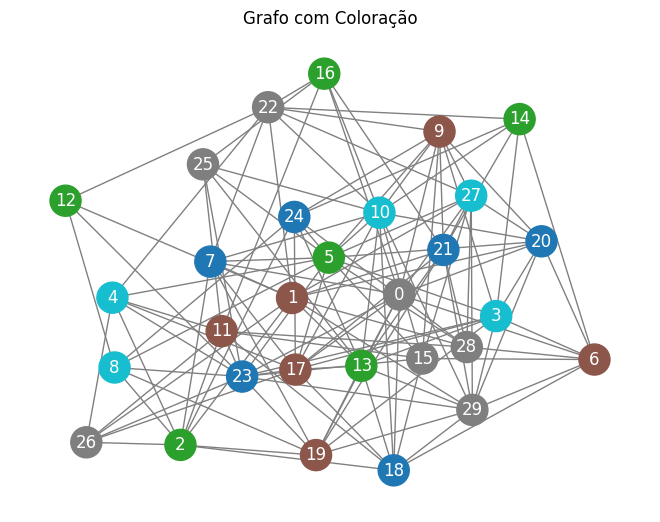

In [14]:
def desenhar_grafo_colorido(G, coloring):
    # Cria uma lista de cores para os nós com base na coloração fornecida
    node_colors = [coloring[node] for node in G.nodes()]
    for u, v in G.edges():
        if node_colors[u] == node_colors[v]:
            print("bateu", u ,"e", v)

    # Desenhar o grafo
    pos = nx.spring_layout(G, seed=42)  # layout bonito e fixo
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        cmap=plt.cm.tab10,  # até 10 cores distintas
        node_size=500,
        edge_color='gray',
        font_color='white'
    )
    plt.title("Grafo com Coloração")
    plt.show()

desenhar_grafo_colorido(G, coloring)



In [17]:
print(list(G.neighbors(5)))
print(coloring[5])
for node in G.nodes:
    if coloring[node] == 1:
        print(node,coloring[node])

[7, 9, 17, 20, 23, 27, 28, 4, 8, 24, 3, 10, 15, 25]
1
13 1
16 1
2 1
12 1
5 1
14 1
